<h1 style="color: skyblue;">Assignment-1</h1>
<h2 style="color: orange;">Q2</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("landslide_data_miss.csv")
print(df.shape)

(945, 9)


In [3]:
df1=df.dropna(subset=['stationid'])

In [4]:
print(df1.shape)

(926, 9)


In [5]:
df1=df1.dropna(thresh=df.shape[1]/3)

In [6]:
print(df1.shape)

(912, 9)


In [7]:
df2=df

In [8]:
df2=df2.set_index('dates')

In [9]:
df2.head(5)

,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
dates,,,,,,,,
08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385


In [10]:
def interpolate(df):
    for i,v in enumerate(df):
        if pd.isnull(df.iloc[i]) and i>0 and i< df.shape[0]-1:
            prev_index=i-1
            next_index=i+1
            while next_index<df.shape[0] and pd.isnull(df.iloc[next_index]):
                next_index+=1
            if next_index<df.shape[0]:
                ip= df.iloc[prev_index] + (i-prev_index)*(df.iloc[next_index]-df.iloc[prev_index])/(next_index-prev_index)
                df.iat[i]=ip

            

In [11]:
columns=df2.columns.tolist()
columns

['stationid',
 'temperature',
 'humidity',
 'pressure',
 'rain',
 'lightavg',
 'lightmax',
 'moisture']

In [12]:
for i in columns:
    if (i!='stationid' and i!='dates'):
        interpolate(df2[i])



In [13]:
df2.isnull().sum()

stationid      19
temperature     0
humidity        0
pressure        0
rain            0
lightavg        0
lightmax        0
moisture        0
dtype: int64

In [14]:
df2.sample(6)

,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
dates,,,,,,,,
28-09-2018,t13,22.86957,62.00000,1011.727826,0.00,69.9167,4000.0,73.3913
11-08-2018,t14,23.81690,99.00000,1006.567535,144.00,650.0122,2259.0,66.0704
01-09-2018,t14,25.51376,95.46789,908.822110,15.75,1057.5570,4000.0,66.2752
04-08-2018,t8,22.40230,97.87356,1006.325172,949.50,1160.1818,6056.0,89.8276
30-08-2018,t9,23.74820,98.23022,1015.427266,4212.00,483.6400,4000.0,97.9784
15-09-2018,t8,21.49296,93.75352,1017.014507,105.75,2837.5584,6415.0,97.1479


In [15]:
cols=df2.iloc[:,1:].columns.tolist()
    

In [16]:
cols

['temperature',
 'humidity',
 'pressure',
 'rain',
 'lightavg',
 'lightmax',
 'moisture']

In [17]:

def mean_(df):
    newf={}
    for i in df[cols]:
        sum1=0
        for j in df[i]:
            sum1+=j
        mean1=round(sum1/df[i].shape[0],1)
        newf[i]=mean1
    return newf
        

In [18]:
miss_ans=mean_(df2)
miss_ans

{'temperature': 21.2,
 'humidity': 83.5,
 'pressure': 1009.3,
 'rain': 10651.6,
 'lightavg': 4486.3,
 'lightmax': 21517.2,
 'moisture': 32.3}

In [19]:
original=pd.read_csv("landslide_data_original.csv")

In [20]:
original_ans=mean_(original)

In [21]:
original_ans

{'temperature': 21.2,
 'humidity': 83.5,
 'pressure': 1009.0,
 'rain': 10701.5,
 'lightavg': 4438.4,
 'lightmax': 21788.6,
 'moisture': 32.4}

In [22]:
def median_(df):
    dic = {}
    for i in cols:
        sorted_col = df[i].sort_values() 
        if sorted_col.shape[0] % 2 == 0:
            med =round( (sorted_col.iloc[sorted_col.shape[0] // 2 - 1] + sorted_col.iloc[sorted_col.shape[0] // 2]) / 2 ,1)
        else:
            med = round(sorted_col.iloc[sorted_col.shape[0] // 2],1)
        dic[i] = med
    return dic


In [23]:
med_miss=median_(df2)
med_miss

{'temperature': 22.2,
 'humidity': 91.4,
 'pressure': 1014.7,
 'rain': 22.5,
 'lightavg': 1623.5,
 'lightmax': 6569.0,
 'moisture': 16.3}

In [24]:
med_original=median_(original)

In [25]:
med_original

{'temperature': 22.3,
 'humidity': 91.4,
 'pressure': 1014.7,
 'rain': 18.0,
 'lightavg': 1656.9,
 'lightmax': 6634,
 'moisture': 16.7}

In [26]:
def std_(df):
   dic={}
   for i in df[cols]:
        sigma=0
        mean1=sum(df[i])/df[i].shape[0]
        for j in df[i]:
            sigma=sum((df[i]-mean1)**2)
        std=np.sqrt(sigma/df[i].shape[0])
        dic[i]=round(std,1)
   return dic
    # return mean

In [27]:
miss_std=std_(df2)
miss_std

{'temperature': 4.3,
 'humidity': 18.2,
 'pressure': 46.0,
 'rain': 24766.4,
 'lightavg': 7569.8,
 'lightmax': 21923.6,
 'moisture': 33.6}

In [28]:
original_std=std_(original)
original_std

{'temperature': 4.4,
 'humidity': 18.2,
 'pressure': 47.0,
 'rain': 24839.1,
 'lightavg': 7569.2,
 'lightmax': 22053.3,
 'moisture': 33.6}

In [29]:
data = {'original_mean': original_ans,
        'missing_mean': miss_ans,
        'original_median': med_original,
        'missing_median': med_miss,
        'original_std': original_std,
        'miss_std': miss_std}

df = pd.DataFrame(data)
pd.set_option('display.expand_frame_repr', False)
print(df)


             original_mean  missing_mean  original_median  missing_median  original_std  miss_std
temperature           21.2          21.2             22.3            22.2           4.4       4.3
humidity              83.5          83.5             91.4            91.4          18.2      18.2
pressure            1009.0        1009.3           1014.7          1014.7          47.0      46.0
rain               10701.5       10651.6             18.0            22.5       24839.1   24766.4
lightavg            4438.4        4486.3           1656.9          1623.5        7569.2    7569.8
lightmax           21788.6       21517.2           6634.0          6569.0       22053.3   21923.6
moisture              32.4          32.3             16.7            16.3          33.6      33.6


In [30]:
original.set_index('dates', inplace=True)

In [31]:
df2.shape

(945, 8)

In [32]:
original.shape

(945, 8)

In [33]:
df2.head()

,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
dates,,,,,,,,
08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.00000
09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.69300
10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,5.86515
11-07-2018,t10,24.61972,87.68657,1036.857463,963.00,8.8358,4000.0,6.03730
12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.23850


In [34]:
cols

['temperature',
 'humidity',
 'pressure',
 'rain',
 'lightavg',
 'lightmax',
 'moisture']

In [35]:
def rmse(df1,df2):
    dic={}
    for i in cols:
        top=sum((df1[i].values-df2[i].values)**2)
        rmse=np.sqrt(top/df1.shape[0])
        dic[i]=round(rmse,2)
    return dic
        
    
        
        
        

In [36]:
rmse_ans=rmse(original,df2)
rmse_ans

{'temperature': 0.49,
 'humidity': 0.84,
 'pressure': 7.03,
 'rain': 1206.15,
 'lightavg': 1241.59,
 'lightmax': 3830.83,
 'moisture': 1.27}

Text(0, 0.5, 'RMSE--------->')

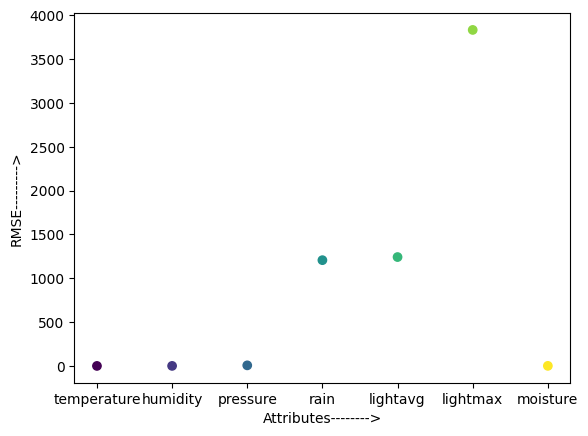

In [37]:
import matplotlib.pyplot as plt
colors = [1,2,3,4,5,6,7]
plt.scatter(rmse_ans.keys(),rmse_ans.values(),c=colors)
plt.xlabel("Attributes-------->")
plt.ylabel("RMSE--------->")

<h2 style="color: orange;">Q3</h2>

In [39]:
def outl(df):
    dic={}
    for i in cols:
        iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
        mini=df[i].quantile(0.25)- 1.5*iqr
        maxi=df[i].quantile(0.75)+1.5*iqr
        col_out=[]
        for j in df[i]:
            if j<mini or j>maxi:
                col_out.append(j)
        dic[i]=col_out
    return dic
        

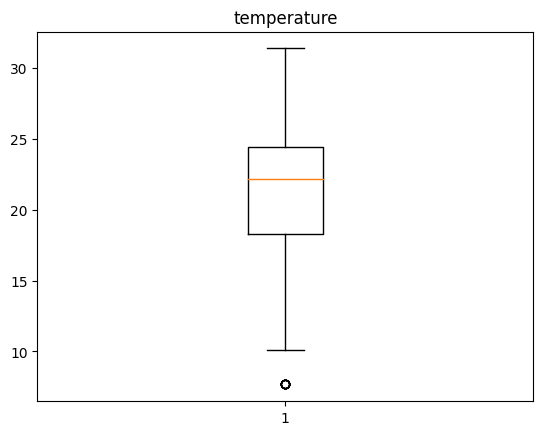

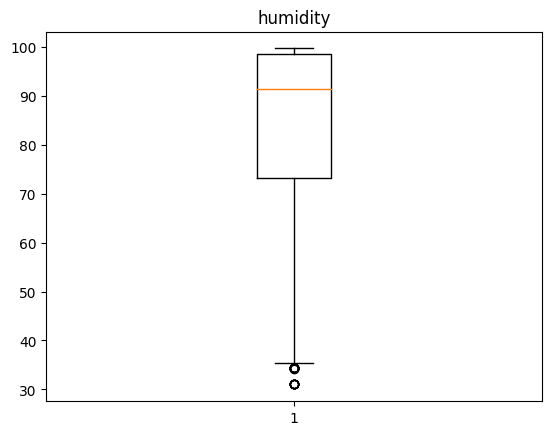

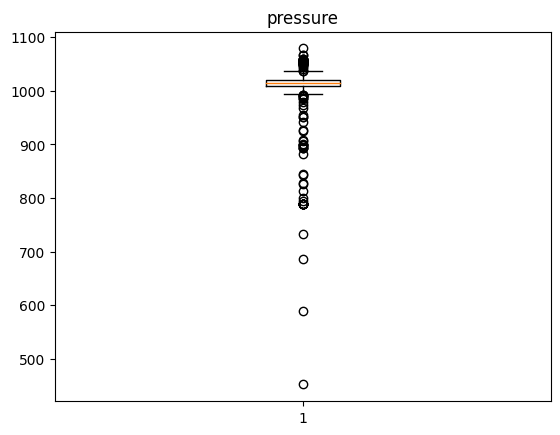

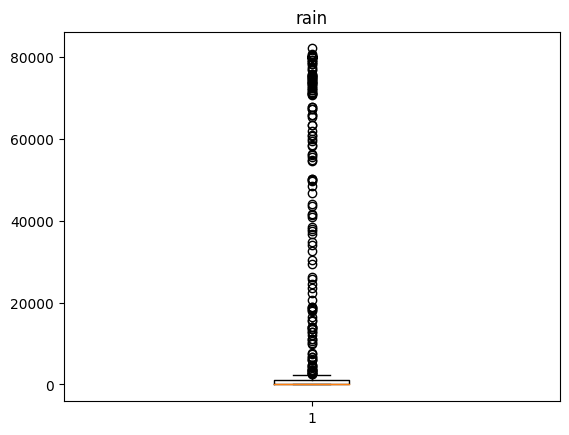

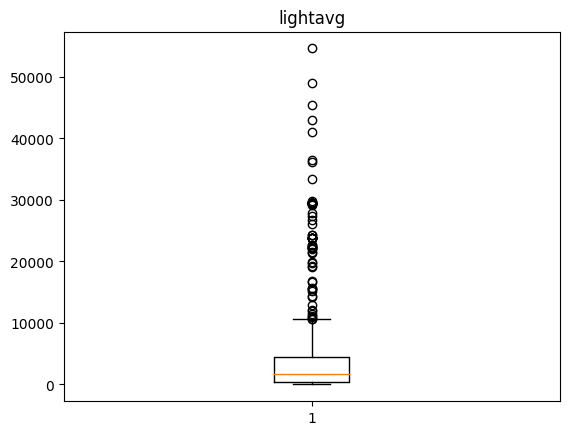

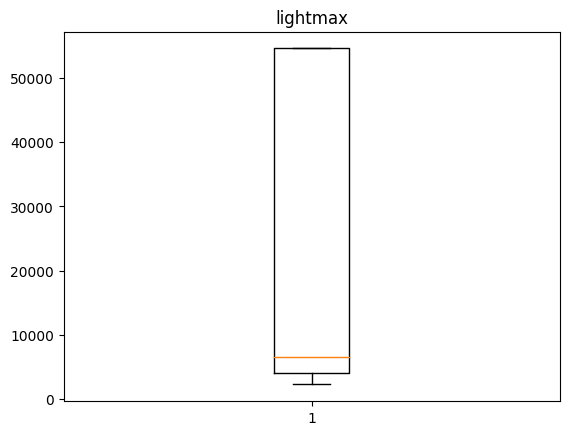

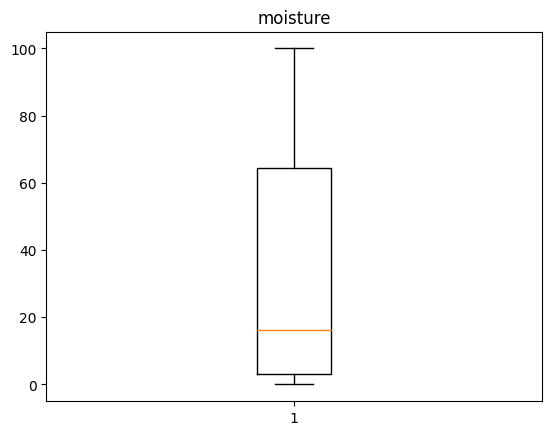

In [40]:
for i in cols:
    plt.boxplot(df2[i])
    plt.title(i)
    plt.show()

In [41]:
outliers=outl(df2)


In [42]:
import json
str=json.dumps(outliers,indent=2)
print(str)

{
  "temperature": [
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729,
    7.6729
  ],
  "humidity": [
    31.0,
    31.0,
    31.07143,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    34.26923,
    31.0,
    31.0,
    31.0,
    31.0,
    31.0,
    34.20567
  ],
  "pressure": [
    1037.889362,
    991.6541121,
    800.0,
    894.634,
    894.0100735,
    893.8089565,
    789.3926923,
    812.4557229,
    893.6775373,
    973.53853615,
    1053.399535,
    1044.148333,
    882.735,
    991.693617,
    986.093007,
    990.115493,
    987.0530657,
    588.4661972,
    452.0978873,
    1054.751163,
    1055.439552,
    1055.291791,
    1054.119048,
    1053.457778,
    105

In [43]:
def replacebymedian(df):
    for i,v in enumerate(df):
            iqr=df.quantile(0.75)-df.quantile(0.25)
            mini=df.quantile(0.25)- 1.5*iqr
            maxi=df.quantile(0.75)+ 1.5*iqr
            sorted=df.sort_values(ascending=True)
            median_=df.iloc[sorted.shape[0]//2]
            if v>maxi or v<mini:
                df.iat[i]=median_

In [44]:
df4=df2

In [45]:
df3=df2
for i in cols:
    replacebymedian(df3[i])

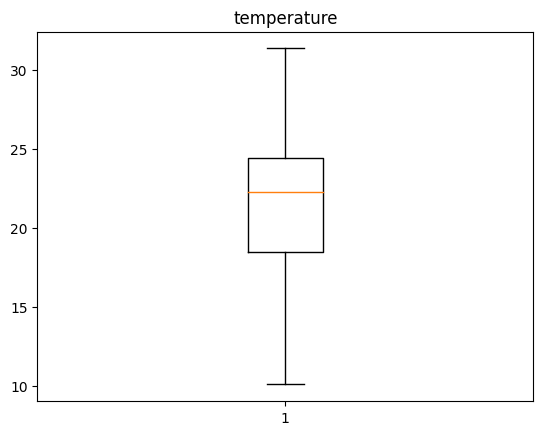

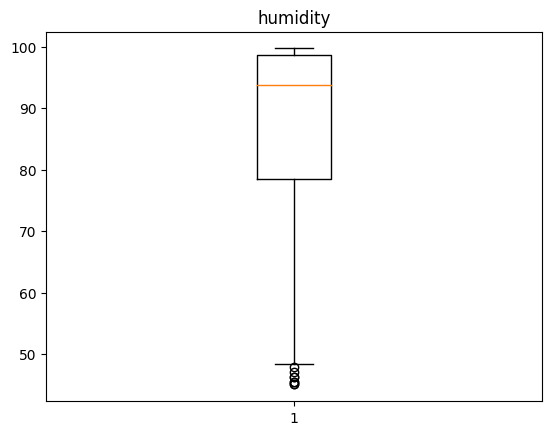

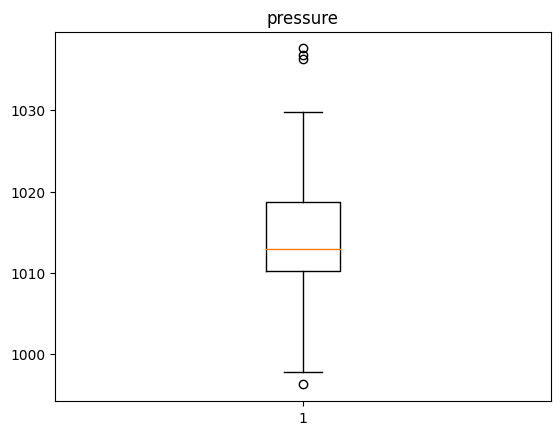

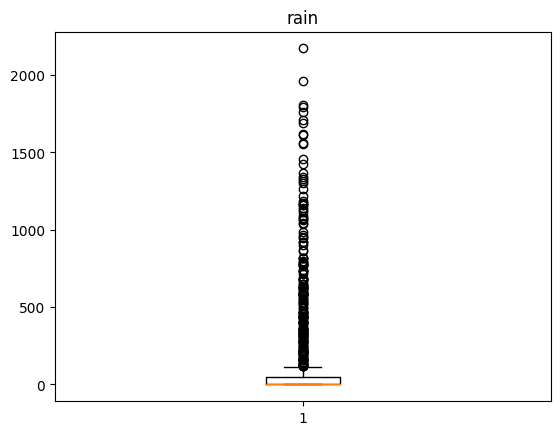

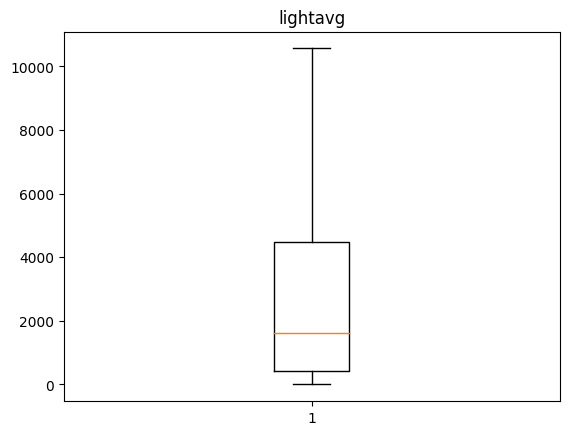

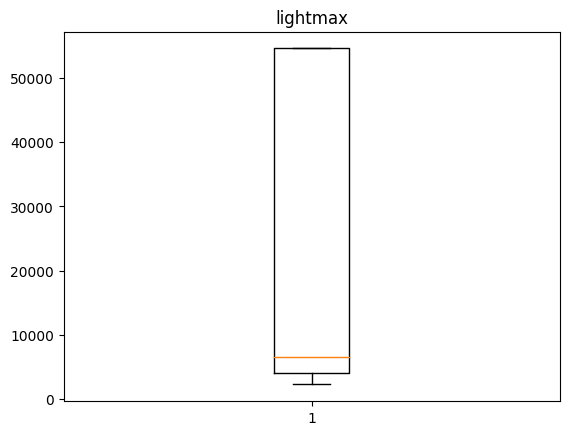

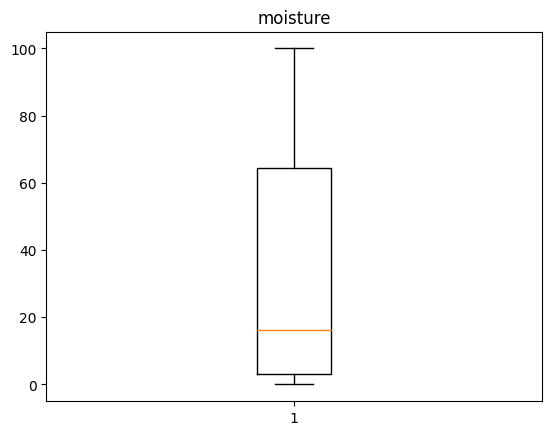

In [46]:
for i in cols:
    plt.boxplot(df3[i])
    plt.title(i)
    plt.show()

<h2 style="color: orange;">Q4</h2>

In [47]:
def normalization(df):
    maxi=np.max(df)
    mini=np.min(df)
    upp,low=12,5
    for i,v in enumerate(df):
            nrml=(((v-mini)/(maxi-mini))*(upp-low))+low
            df.iat[i]=nrml

In [48]:

for i in cols:
    normalization(df3[i])

In [49]:
df3.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,8.711452,10.316210,8.046533,5.421374,6.503971,7.574969,7.262920
std,1.351034,1.903058,1.038641,1.004306,1.468447,2.932901,2.352180
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.760941,9.278500,7.356904,5.000000,5.276306,5.232785,5.209510
50%,9.012168,11.232240,7.813023,5.000000,6.075635,5.576280,6.141462
75%,9.712139,11.857202,8.791643,5.152332,7.974096,12.000000,9.517499
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


In [50]:
def standardization(df):
    mean_=np.mean(df)
    std_=np.std(df)
    for i,v in enumerate(df):
            stnd=(v-mean_)/std_
            df.iat[i]=stnd

In [51]:
df4.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,8.711452,10.316210,8.046533,5.421374,6.503971,7.574969,7.262920
std,1.351034,1.903058,1.038641,1.004306,1.468447,2.932901,2.352180
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.760941,9.278500,7.356904,5.000000,5.276306,5.232785,5.209510
50%,9.012168,11.232240,7.813023,5.000000,6.075635,5.576280,6.141462
75%,9.712139,11.857202,8.791643,5.152332,7.974096,12.000000,9.517499
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


In [52]:
for i in cols:
    standardization(df4[i])

In [53]:
round(df4.describe(),2)

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.00,945.00,945.00,945.00,945.00,945.00,945.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.75,-2.79,-2.93,-0.42,-1.02,-0.88,-0.96
25%,-0.70,-0.55,-0.66,-0.42,-0.84,-0.80,-0.87
50%,0.22,0.48,-0.22,-0.42,-0.29,-0.68,-0.48
75%,0.74,0.81,0.72,-0.27,1.00,1.51,0.96
max,2.44,0.89,3.81,6.55,3.74,1.51,2.01
